# Modeling Airbnb Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#suppress lengthy warning messages
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv('listings.csv', low_memory = False)

### Exploratory Data Analysis and Preprocessing

In [507]:
X.shape

(20677, 106)

In [3]:
col_dtypes = []
for col in X.columns: 
    col_dtypes.append(X[col].dtype)
col_dtypes_df = pd.DataFrame({'dtype': col_dtypes}, index = X.columns)
col_dtypes_df.dtype.value_counts()

object     62
float64    23
int64      21
Name: dtype, dtype: int64

There appear to be many columns of type 'object'.
Numeric columns (float64 + int64) should be the least problematic for models, so let's investigate them first: 

In [509]:
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
#numeric_cols

Most columns look legitimate. Curious that 'url' columns are included. Further investigation needed

In [4]:
X[['thumbnail_url','medium_url','xl_picture_url']]
X.thumbnail_url.unique()
X.medium_url.unique()
X.xl_picture_url.unique()
#all are arrays of NaN. Single-value columns should be removed

array([nan])

In [5]:
#following code removes single-value columns: 
use_cols = [col for col in X.columns if X[col].nunique()> 1]
X = X[use_cols]

#reset numeric_cols
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [6]:
X[numeric_cols].describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,2.067700e+04,20665.000000,20665.000000,20677.000000,20677.000000,20677.000000,20671.000000,20669.000000,20669.000000,...,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,5.666981e+07,7.010888,7.010888,52.365278,4.889565,2.879335,1.158580,1.454400,1.829213,...,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,6.812902e+07,37.729548,37.729548,0.016353,0.035970,1.314935,0.380091,0.894856,1.407580,...,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,3.159000e+03,0.000000,0.000000,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,8.795077e+06,1.000000,1.000000,52.355130,4.863870,2.000000,1.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,2.618942e+07,1.000000,1.000000,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,7.754037e+07,2.000000,2.000000,52.375190,4.909260,4.000000,1.000000,2.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,2.839422e+08,980.000000,980.000000,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,208.000000,206.000000,15.000000,8.000000,33.670000


Now, look at the other columns:

In [7]:
other_cols = [col for col in X if X[col].dtype in ['O'] ]

In [8]:
X[other_cols].describe()

,listing_url,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,...,calendar_updated,calendar_last_scraped,first_review,last_review,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,20677,20677,20642,20048,15255,20458,14093,9154,14375,12209,...,20677,20677,18084,18084,25,20640,20677,20676,20677,20677
unique,20677,3,20167,19472,14843,20172,12780,7338,13636,9582,...,75,3,2276,1396,7,4,2,5,2,2
top,https://www.airbnb.com/rooms/21241593,2019-08-09,Amsterdam,Sleeping up to 2 guests in luxury surroundings...,This gorgeous apartment is excellently designe...,Hotel Jansen is a new Short Stay hotel in Amst...,Amsterdam West is one of the most diverse neig...,Freshly made up beds and crispy towels (one pe...,You have not experienced the Dutch culture tru...,Guests are invited to enjoy the whole apartmen...,...,today,2019-08-09,2016-03-30,2019-08-04,GB 709304057,"{Amsterdam,"" NL""}",f,strict_14_with_grace_period,f,f
freq,1,13225,39,40,46,13,52,222,17,391,...,2958,13224,77,555,11,14340,15226,8003,20450,20378


In [9]:
#price is represented as a string currently, so convert that to a float
def priceToNumeric(col):
    return [float(value.replace(',', '').replace('$', '')) for value in col]

X['price'] = priceToNumeric(X['price'])

In [14]:
#convert date strings -> int, so that it can be input into models
from datetime import datetime 
def dateProcessor(df, col_names):
    df_use = df.copy()
    for col_name in col_names: 
        df_use[col_name+'_year'] = [int((datetime.strptime(value, '%Y-%m-%d')).year) if isinstance(value, str) else np.nan for value in df[col_name] ]
        df_use[col_name+'_month'] = [int((datetime.strptime(value, '%Y-%m-%d')).month) if isinstance(value, str) else np.nan for value in df[col_name]]
        df_use[col_name+'_day'] = [int((datetime.strptime(value, '%Y-%m-%d')).day) if isinstance(value, str) else np.nan for value in df[col_name]]
    return df_use
        
X = dateProcessor(X, ['last_scraped', 'last_review', 'first_review', 'calendar_last_scraped'])        


In [15]:
categorical_vars = [col for col in X if X[col].nunique() < 10 and X[col].dtype == "object"]
X[categorical_vars].describe()

,last_scraped,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,market,is_location_exact,room_type,bed_type,calendar_last_scraped,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,20677,12136,20665,20665,20665,20637,20677,20677,20677,20677,25,20640,20677,20676,20677,20677
unique,3,4,2,2,2,4,2,3,5,3,7,4,2,5,2,2
top,2019-08-09,within an hour,f,t,f,Amsterdam,t,Entire home/apt,Real Bed,2019-08-09,GB 709304057,"{Amsterdam,"" NL""}",f,strict_14_with_grace_period,f,f
freq,13225,6217,17451,20649,12602,20631,14471,16402,20498,13224,11,14340,15226,8003,20450,20378


In [16]:
X_OH_encoded = pd.get_dummies(X[categorical_vars])

In [17]:
#X now includes cleaned date columns and one-hot encoded categorical columns
X = pd.concat([X_OH_encoded, X], axis = 1)
X = X.loc[:,~X.columns.duplicated()]

In [18]:
#now, we can remove all of the columns that are still categorical 
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
X = X[numeric_cols]

In [19]:
#final cleaned data to use for models
X.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,last_scraped_day,last_review_year,last_review_month,last_review_day,first_review_year,first_review_month,first_review_day,calendar_last_scraped_year,calendar_last_scraped_month,calendar_last_scraped_day
count,2.067700e+04,2.067700e+04,20665.000000,20665.000000,20677.000000,20677.000000,20677.000000,20671.000000,20669.000000,20669.000000,...,20677.000000,18084.000000,18084.000000,18084.000000,18084.000000,18084.000000,18084.000000,20677.0,20677.000000,20677.000000
mean,1.791013e+07,5.666981e+07,7.010888,7.010888,52.365278,4.889565,2.879335,1.158580,1.454400,1.829213,...,8.639358,2018.305629,6.551758,15.471522,2016.625581,6.465605,15.254700,2019.0,8.000048,8.639309
std,1.041987e+07,6.812902e+07,37.729548,37.729548,0.016353,0.035970,1.314935,0.380091,0.894856,1.407580,...,0.481707,1.043854,2.402447,9.532315,1.677107,3.042343,9.114906,0.0,0.006954,0.481721
min,2.818000e+03,3.159000e+03,0.000000,0.000000,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,...,3.000000,2012.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,2019.0,8.000000,3.000000
25%,9.340207e+06,8.795077e+06,1.000000,1.000000,52.355130,4.863870,2.000000,1.000000,1.000000,1.000000,...,8.000000,2018.000000,5.000000,6.000000,2016.000000,4.000000,7.000000,2019.0,8.000000,8.000000
50%,1.774427e+07,2.618942e+07,1.000000,1.000000,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,...,9.000000,2019.000000,7.000000,16.000000,2017.000000,7.000000,15.000000,2019.0,8.000000,9.000000
75%,2.601974e+07,7.754037e+07,2.000000,2.000000,52.375190,4.909260,4.000000,1.000000,2.000000,2.000000,...,9.000000,2019.000000,8.000000,24.000000,2018.000000,9.000000,23.000000,2019.0,8.000000,9.000000
max,3.759099e+07,2.839422e+08,980.000000,980.000000,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,...,9.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000,2019.0,9.000000,9.000000


In [20]:
X_store = X.copy() 
#store this for later

In [21]:
X_store.to_csv('cleaned_airbnb.csv')

### Modeling Prices 

XGBoost model to predict price. I used this model because XGBoost is good for regression; has been implemented successfully for this type of data

In [523]:
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [524]:
y = X.price
X.drop(['price'], axis=1, inplace=True)

(array([8.000e+00, 9.500e+01, 1.588e+03, 9.821e+03, 7.575e+03, 1.391e+03,
        1.750e+02, 1.200e+01, 4.000e+00, 7.000e+00]),
 array([2.19722458, 2.88705117, 3.57687777, 4.26670436, 4.95653096,
        5.64635755, 6.33618415, 7.02601074, 7.71583734, 8.40566394,
        9.09549053]),
 <a list of 10 Patch objects>)

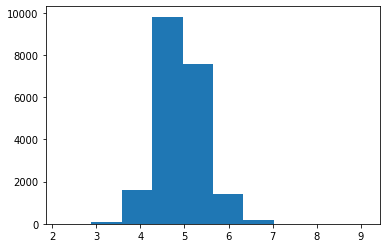

In [525]:
#take a look at the response distribution
plt.hist(np.log(y[y != 0.0]))

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [527]:
model_1 = XGBRegressor(random_state = 0)

In [528]:
model_1.fit(X_train, y_train)

[21:21:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [529]:
predictions_1 = model_1.predict(X_test)

In [530]:
model_1_mse = mean_squared_error(y_test, predictions_1)
model_1_mse

26396.62457252784

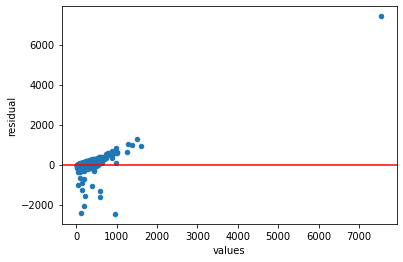

In [531]:
#scatterplot of the residuals 
pd.DataFrame({'residual':y_test.values- predictions_1, 'values': y_test.values}).plot.scatter(y = 'residual', x = 'values')
plt.axhline(y=0, color='r', linestyle='-')

#### Summary: 
Some residuals seem skewed with one large outlier, and the mse (26396) seems high. Improvements could be made with parameter tuning and performing nlp on some of the descriptive data which was mostly omitted in this model. 

### Predicting Availability

Used a random forest regressor for this problem. 

In [532]:
from sklearn.ensemble import RandomForestRegressor


In [533]:
X = X_store.copy()
y = X.availability_30
X.drop(['availability_30'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

(array([ 780.,    0.,  693.,  594.,  993.,  826.,  934.,  961.,  709.,
        1152.]),
 array([0.        , 0.34011974, 0.68023948, 1.02035921, 1.36047895,
        1.70059869, 2.04071843, 2.38083817, 2.72095791, 3.06107764,
        3.40119738]),
 <a list of 10 Patch objects>)

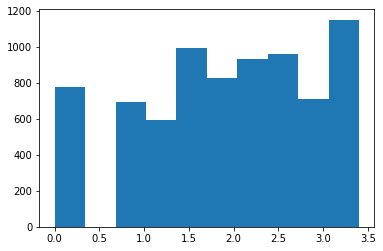

In [534]:
#plt.hist(y)
plt.hist(np.log(y[y!=0]))

0.940456185328833

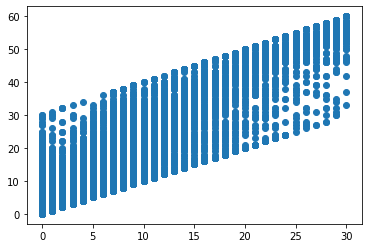

In [535]:
#It might be inaccurate to include availability_60 and 90 for a model of availability_30
X_1 = X_store.copy()
plt.scatter(x= X_1['availability_30'], y = X_1['availability_60'])
X_1['availability_30'].corr( X_1['availability_60'])

In [536]:
print(X_1['availability_30'].corr( X_1['availability_90']))
print(X_1['availability_30'].corr( X_1['availability_365']))

0.8804491901921099
0.5726489124229313


In [537]:
model_2 = RandomForestRegressor(random_state=1)

In [538]:
#Wrote it like this to avoid showing full error message: 
try: 
    model_2.fit(X_train, y_train)
except: 
    print("ValueError: Input contains NaN, infinity or a value too large for dtype('float32').")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').


Need to impute NaN values in X_train()

In [539]:
from sklearn.impute import SimpleImputer
X_train[:] = np.nan_to_num(X_train)
X_train.shape

(16541, 50)

In [540]:
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [541]:
X_test[:] = np.nan_to_num(X_test)
model_2_preds = model_2.predict(X_test)

In [542]:
model_2_mse = mean_squared_error(y_test, model_2_preds)
model_2_mse

4.442903771760155

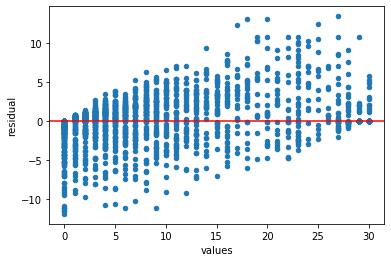

In [543]:
#scatterplot of the residuals 
pd.DataFrame({'residual':y_test.values- model_2_preds, 'values': y_test.values}).plot.scatter(y = 'residual', x = 'values')
plt.axhline(y=0, color='r', linestyle='-')

#### Summary
Model seems to perform fairly well from basic diagnostics. MSE is low, and residuals are fairly evenly distributed, although there is a neg to pos pattern. Could potentially improve by better processing text features and optimizing n_estimators. 

### Model without other Availability Columns

Checking the difference to the model if highly correlated availability features are removed. 

In [544]:
X = X_store.copy()
y = X.availability_30
X.drop(['availability_30','availability_60','availability_90', 'availability_365'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)
len(X_train.columns)

47

In [545]:
model_3 = RandomForestRegressor(random_state=1)

In [546]:
X_train[:] = np.nan_to_num(X_train)
model_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [547]:
X_test[:] = np.nan_to_num(X_test)
model_3_preds = model_3.predict(X_test)
model_3_mse = mean_squared_error(y_test, model_3_preds)

In [548]:
model_3_mse

36.52312620889749

#### Summary
the mse went from 4.44 to 36.5, clearly a significant change. The removal of the other availability features significantly decreased the predictive power of the model. 